<a href="https://colab.research.google.com/github/JSEFERINO/Teoria-de-Probabilidad-MEYCD/blob/main/Copia_de_30_C_Teoria_Teoremas_Limites_T_Central_Limite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Teoría de Probabilidad por Julio Hurtado Márquez**
## **Parte XII- Modelos Probabilísticos Continuos**
# **Librerias para usar en esta parte del curso**

In [ ]:
# **Librerias para usar en esta parte del cursor**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sympy.functions.combinatorial.factorials import factorial
import math
from math import sqrt
from numpy.ma.core import log
from sympy import integrate, init_printing
from sympy.abc import x
print("Setup Complete")

Setup Complete




# **199. Teorema Central del Límite -TCL**
# **a. Generalidades**
+ El TCL afirma que el promedio de una muestra aleatoria proveniente de cualquier población conocida o no, tiende en el límite a una Distribución Normal.

 - $$\bar X=\frac{1}{n}\sum_{1}^{n}X_i →\mathbb{N}(μ,σ^2/n)$$ cuando $n→∞$

# **b. El Terorema**

- Sean ${\displaystyle X_{1},X_{2},\dots ,X_{n}}$ variables aleatorias independientes e idénticamente distribuidas con ${\displaystyle \operatorname {E} [X_{i}]=\mu }$ y ${\displaystyle \operatorname {Var} (X_{i})=\sigma ^{2}<\infty }$, se define

$${\displaystyle Z_{n}:={\frac {\sum _{i=1}^{n}X_{i}-n\mu }{\sigma {\sqrt {n}}}}}$$


- Entonces la función de distribución de ${\displaystyle Z_{n}}$ converge hacia la función de distribución normal estándar cuando ${\displaystyle n\to \infty }$, es decir,

$${\displaystyle \lim _{n\to \infty }\operatorname {P} \left(Z_{n}\leq z\right)=\Phi (z)=\int _{-\infty }^{z}{\frac {1}{\sqrt {2\pi }}}e^{-{\frac {x^{2}}{2}}}dx}$$
- Es muy común encontrarlo con la variable estandarizada ${\displaystyle Z_{n}}$ en función de la media muestral ${\displaystyle {\overline {X}}}$, es decir

$${\displaystyle Z_{n}={\frac {{\overline {X}}-\mu }{\sigma /{\sqrt {n}}}}}$$
+ puesto que son equivalentes (sólo se divide tanto numerador como denominador entre $n$

+ Es importante remarcar que este teorema no dice nada acerca de la distribución de la variable aleatoria ${\displaystyle {X_{i}}}$, excepto la existencia de media y varianza.




# **201. Ejemplos del Teorema de Límite Central - Tomando Muestras de 4 Poblaciones**
+ **Tomado de:** https://relopezbriega.github.io/blog/2016/11/26/introduccion-a-la-teoria-de-probabilidad-con-python/
 # **a. Ejemplo. Supongamos que tenemos 4 muestras aleatorias tomadas de cuatro poblaciones diferentes: Binomial, Exponencial, Poisson y Geométrica. Veamos que ocurre con la tendencia de  $$\bar X=\frac{1}{n}\sum_{1}^{n}X_i$$ segun el TCL cuando $n→∞$ se debe cumplir que $$\mathbb{N}(μ,σ^2/n)$$**

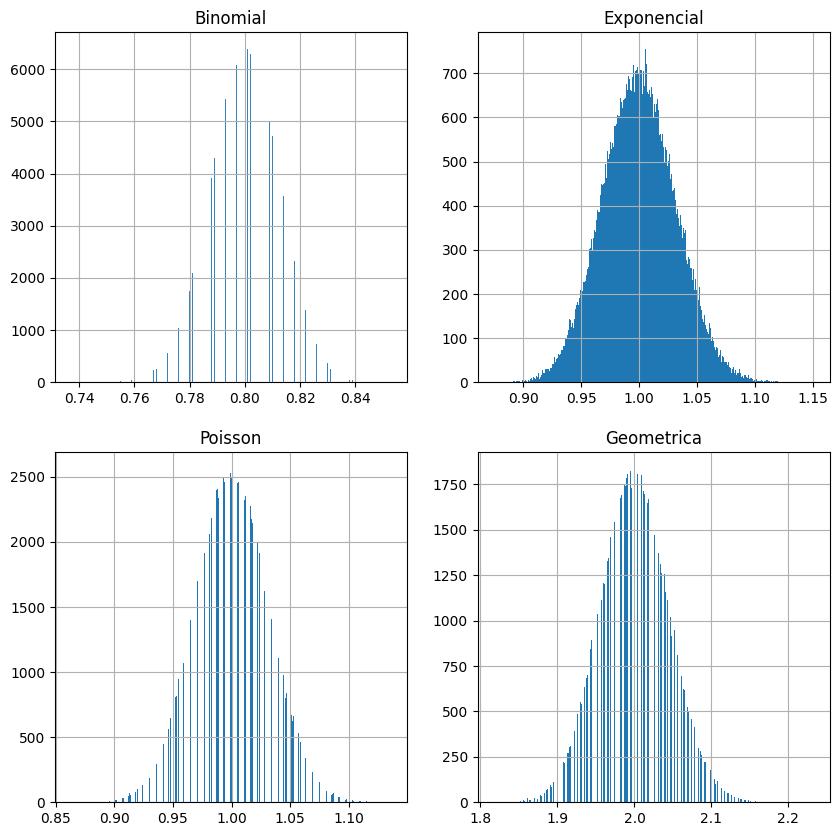

In [ ]:
# Ejemplo teorema del límite central
# Muestra 1 - Tomada de una población Binomial
Binomial = []
media = 0.8 # Parametro de la Distribución Binomial

# Muestra 2 - Tomada de una población Exponencial
Exponencial = []
lam = 1 # Parametro de la Distribución Exponencial

# Muestra 3 - Tomada de una población Poisson
Poisson = []
lam = 1 # Parametro de la Distribución Poisson


# Muestra 4 - Tomada de una población Poisson
Geometrica = []
p = 0.5 # Parametro de la Distribución Poisson

# Tamaño de la muestra
n = 1000


for i in range(1,200000):
    muestra_1 = np.random.binomial(1, media, n) # Tomamos la muestra aleatoria de la poblacion Binomial
    Binomial.append(muestra_1.mean()) # La muestra tomada se Almacena en Binomial =[]

    muestra_2 = np.random.exponential(lam,n)# Tomamos la muestra aleatoria de la poblacion Binomial
    Exponencial.append(muestra_2.mean())

    muestra_3 = np.random.geometric(p, n)
    Geometrica.append(muestra_3.mean())

    muestra_4 = np.random.poisson (lam, n)
    Poisson.append(muestra_4.mean())

df = pd.DataFrame({ 'Binomial' : Binomial,
                     'Exponencial' : Exponencial,
                     'Poisson' : Poisson,
                    'Geometrica' : Geometrica})

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
df.Binomial.hist(ax=axes[0,0], alpha=0.9, bins=1000)
df.Exponencial.hist(ax=axes[0,1],bins=1000)
df.Poisson.hist(ax=axes[1,0],bins=1000)
df.Geometrica.hist(ax=axes[1,1],bins=1000)

axes[0,0].set_title('Binomial')
axes[0,1].set_title('Exponencial')
axes[1,0].set_title('Poisson')
axes[1,1].set_title('Geometrica')
plt.show()

# **201. Ejemplo 2. Simular el lanzamiento de dos dados n veces - Usando Python**

En una tabla el resumen de nuestro experimento Tabla1. Dados
        dado1  dado2  Total  media  varianza
0           3      6      9    4.5       4.5
1           4      4      8    4.0       0.0
2           4      2      6    3.0       2.0
3           4      5      9    4.5       0.5
4           3      1      4    2.0       2.0
...       ...    ...    ...    ...       ...
999995      2      4      6    3.0       2.0
999996      1      3      4    2.0       2.0
999997      3      3      6    3.0       0.0
999998      2      6      8    4.0       8.0
999999      6      5     11    5.5       0.5

[1000000 rows x 5 columns]


<Axes: xlabel='varianza', ylabel='Density'>

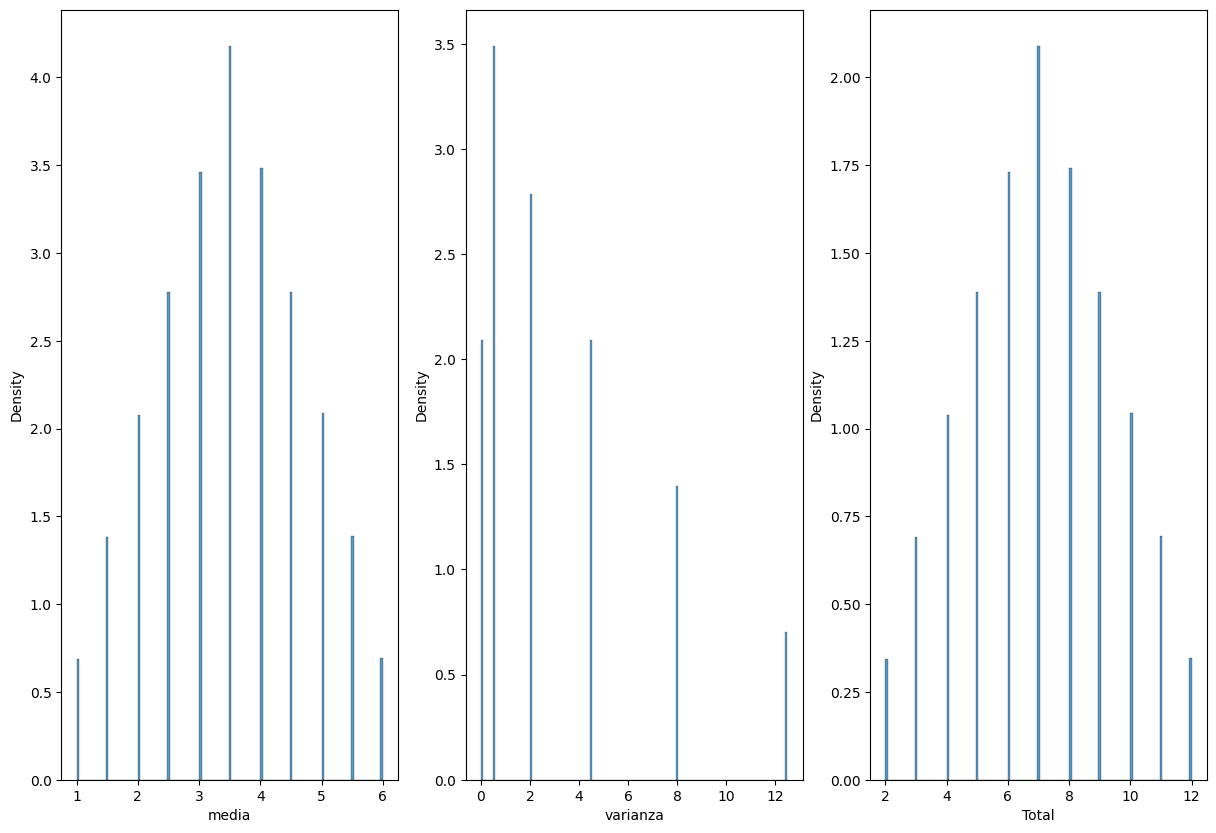

In [ ]:
# **a. Ejemplo: Simular el lanzamiento de dos dados n veces - Usando Python**
import random
#n = int(input("Escriba el número de veces en que lanzara los dos dados: "))
a = 1 # Valor minimo en un dado
b = 6 # Valor máximo en un dado
x=1 # nos va indicar el primer lanzamiento
dado1 = [] # Queremos colocar el resultado obtenido en los lanzamientos del primer dado
dado2 = [] # Queremos colocar el resultado obtenido en los lanzamientos del segundo dado
suma12 = [] # Queremos colocar el total de los resultados obtenido en los lanzamientos de los dos dados
media = []
varianza = []
suma = 0 # Acumular los resultados sumandolos

while x<=1000000: # Esto es para decir que queremos lanzar el dado 10 veces
    valor1=random.randint(a,b) # Cada vez que se henere un lanzamiento, se genera un numero aleatorio entre 1 y 6
    dado1.append(valor1) # Me dice el resultado del dato
    valor2=random.randint(a,b) # Cada vez que se henere un lanzamiento, se genera un numero aleatorio entre 1 y 6
    dado2.append(valor2) # Me dice el resultado del dato
    suma12.append(valor1+valor2)
    media.append((valor1+valor2)/2)
    varianza.append((valor1-valor2)**2/2)

    suma=suma+valor1+valor2 # Acumulando la suma de los valores obtenidos


    x=x+1 # el ciclo se cierra y comienza
promedio=suma/n #Deseo hallar la media de los resultados de los 10 lanzamientos
dados = pd.DataFrame({'dado1':dado1,'dado2':dado2,'Total':suma12,'media':media,'varianza':varianza})


print('En una tabla el resumen de nuestro experimento Tabla1. Dados')
print(dados)

# **b. Muestreo de Medias y varianzas**

plt.figure(figsize=(20,10))
plt.subplot(143)
sns.histplot(dados['Total'], stat="density")
plt.subplot(141)
sns.histplot(dados['media'],  stat="density")
plt.subplot(142)
sns.histplot(dados['varianza'], stat="density")

# **203. Trabajando con Datos reales - Base de datos**
# **a. Elegimos nuestra base de datos**

In [ ]:
#**b. Ahora nuestra data será la copia mejorada**
# @title **Paso 2. Ubicando nuestros datos**
url = 'https://raw.githubusercontent.com/JSEFERINO/Teoria-de-Probabilidad-MEYCD/main/DATOS2023REAL_LIMPIOS.csv'
data3 = pd.read_csv(url,delimiter=',')
data3
#data3=pd.read_csv("/content/DATOS2023REAL_LIMPIOS.csv",delimiter=',')
#data3

,CODIGO,NRC,C1_AI,C1_PI,C1_DEF,C2_AI,C2_P2,C2_DEF,C3_AI,C3_P3,...,EDAD,R_CARTAGENA,PESO,ESTATURA,P_SABER,PROM_UTB,SEXO,ESTRATO,PROCEDENCIA,TRANSPORTE
0,T00070499,1289.0,4.9,4.8,4.9,4.5,4.7,4.6,3.5,4.1,...,18.0,SI,53.0,154.0,315.0,4.5,FEMENINO,5.0,RURAL,Particular
1,T00070672,1289.0,3.2,3.8,3.5,5.1,5.0,5.0,3.5,2.1,...,18.0,SI,58.0,162.0,231.0,3.9,FEMENINO,4.0,URBANO,Taxi
2,T00069677,2516.0,5.4,4.4,4.9,4.9,5.3,5.1,5.4,5.0,...,19.0,SI,45.0,162.0,347.0,4.8,FEMENINO,4.0,RURAL,Particular
3,T00064521,1367.0,3.5,3.4,3.4,3.4,1.2,2.3,3.4,3.4,...,21.0,SI,71.5,180.0,269.0,4.0,MASCULINO,4.0,RURAL,Particular
4,T00065530,2516.0,3.7,3.6,3.7,2.8,2.2,2.5,2.5,2.7,...,19.0,SI,96.0,193.0,346.0,3.9,MASCULINO,4.0,RURAL,Transcaribe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,T00067677,2516.0,4.8,4.8,4.8,5.1,3.0,4.1,5.4,4.3,...,18.0,SI,60.0,164.0,367.0,4.3,FEMENINO,3.0,RURAL,Transcaribe
83,T00067942,1367.0,3.8,4.3,4.0,3.9,2.2,3.1,0.8,3.5,...,25.0,NO,45.0,154.0,245.0,3.8,FEMENINO,2.0,RURAL,El bus que me deja mas cerca
84,T00069301,2516.0,3.2,4.2,3.7,4.2,1.9,3.1,2.7,2.1,...,17.0,SI,49.0,157.0,276.0,3.8,FEMENINO,1.0,URBANO,Transcaribe
85,T00071214,1289.0,3.8,2.3,3.0,4.7,1.4,3.1,3.2,3.9,...,25.0,SI,84.0,184.0,250.0,3.0,FEMENINO,2.0,RURAL,Mototaxi


In [ ]:
data3.columns

Index(['CODIGO', 'NRC', 'C1_AI', 'C1_PI', 'C1_DEF', 'C2_AI', 'C2_P2', 'C2_DEF',
       'C3_AI', 'C3_P3', 'C3_DEF', '100%_DEF', 'PROGRAMA', 'EDAD',
       'R_CARTAGENA', 'PESO', 'ESTATURA', 'P_SABER', 'PROM_UTB', 'SEXO',
       'ESTRATO', 'PROCEDENCIA', 'TRANSPORTE'],
      dtype='object')

# **b. Utilizamos la variable PESO para nuestro estudio- Histograma de la variable**

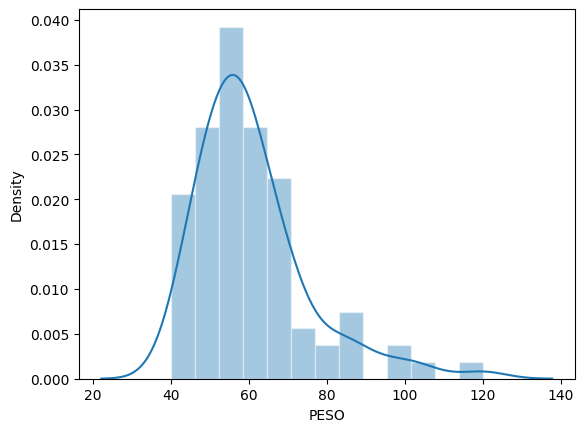

In [ ]:
# **b. Construyamos los Histogramas para las actividades independientes por corte**

sns.histplot(data3['PESO'], kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)

plt.show()

# **c. Vamos a elegir una muestra de Tamaño 50 de los datos en la variable Peso**

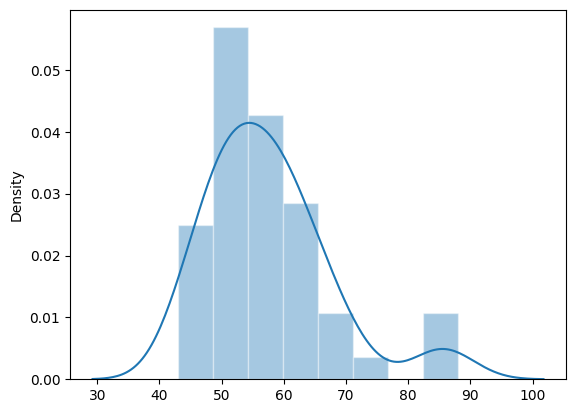

In [ ]:
# **c.**
tamano_muestra = 50
muestra_principal = np.random.choice(data3['PESO'],
                                     tamano_muestra) # choice nos permmite sacar unos datos
muestra_principal
sns.histplot(muestra_principal, kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)

plt.show()


# **d. Vamos a elegir 10000 muestras todas de tamaño 50 de la Variable peso y la almacenamos en _muestras_**

In [ ]:
# **c. Usando la tecnica de BootStrap seleccionaremos 1000 muestras aleatorias y las guardaremos**
muestras = np.array([]) #En este espacio guardaremos cada muestra tomada
num_muestras = 10000 # Este será el tamaño de las muestra
for m in range(num_muestras): # Con este procedimiento grantizamos tomar las mil muestras
    muestras = np.append(muestras,
                         np.random.choice(data3['PESO'],
                                          tamano_muestra,
                                          replace=True)) # guardamos en muestras las seleccionadas de la poblacion inicial
muestras = muestras.reshape(-1, tamano_muestra)
muestras.shape, muestras # nos muestras el tamaño del archivo y las muestras


((10000, 50),
 array([[ 66. ,  57. , 100. , ...,  59. ,  70. ,  57. ],
        [ 45. ,  52. ,  71.5, ...,  65. ,  60. ,  59. ],
        [ 85. ,  59. ,  49. , ..., 120. ,  57. ,  73. ],
        ...,
        [ 53. ,  63. ,  50. , ...,  73. ,  57. ,  71.5],
        [ 45. ,  54. ,  46. , ...,  54. ,  65. ,  85. ],
        [ 50. ,  64. ,  73. , ...,  56. ,  50. ,  58. ]]))

# **e. Hacemos el histograma de los muestras**

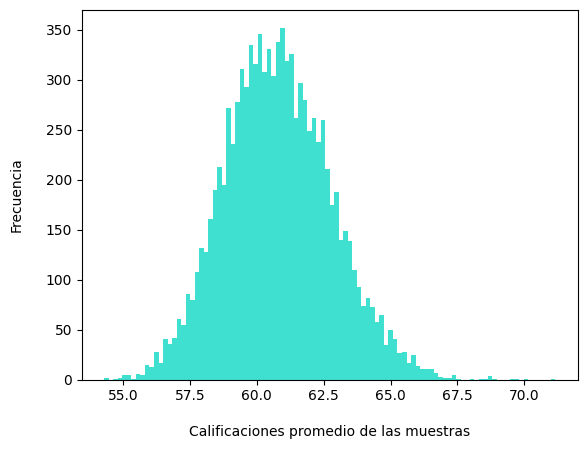

In [ ]:
# **d. Estamos realizando el muestreo de medias**
plt.hist(muestras.mean(axis=1), bins=100, color="turquoise") # Histograma de la distribución muestral de la media
plt.xlabel("\nCalificaciones promedio de las muestras")
plt.ylabel("Frecuencia\n")
plt.show()

# **f. Verificamos que siga una distribución normal**

<Axes: ylabel='Density'>

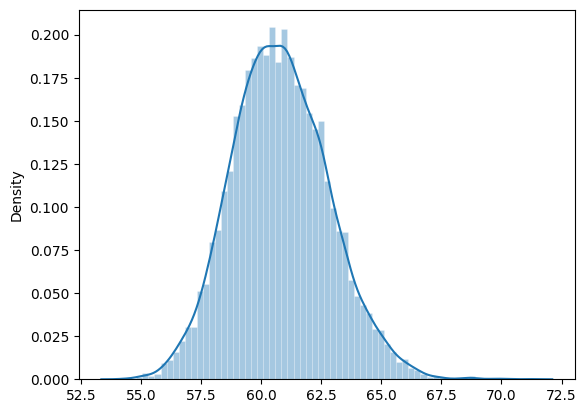

In [ ]:
sns.histplot(muestras.mean(axis=1), kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)

# **204. Elegimos la variable Estatura para hacer el muestreo**

<Axes: ylabel='Density'>

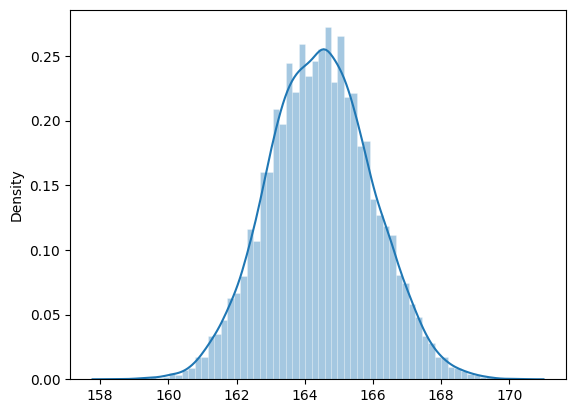

In [ ]:
# **c. Usando la tecnica de BootStrap seleccionaremos 1000 muestras aleatorias y las guardaremos**
estatura = np.array([]) #En este espacio guardaremos cada muestra tomada
num_muestras = 10000 # Este será el tamaño de las muestra
for m in range(num_muestras): # Con este procedimiento grantizamos tomar las mil muestras
    estatura = np.append(estatura,
                         np.random.choice(data3['ESTATURA'],
                                          tamano_muestra,
                                          replace=True)) # guardamos en muestras las seleccionadas de la poblacion inicial
estatura = estatura.reshape(-1, tamano_muestra)
estatura.shape, estatura # nos muestras el tamaño del archivo y las muestras
sns.histplot(estatura.mean(axis=1), kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)

# **205. Elegimos la variable DEFINITIVA para hacer el muestreo**

<Axes: ylabel='Density'>

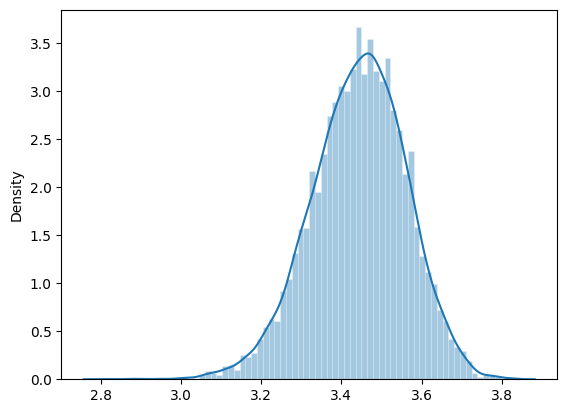

In [ ]:
# **c. Usando la tecnica de BootStrap seleccionaremos 1000 muestras aleatorias y las guardaremos**
DEF = np.array([]) #En este espacio guardaremos cada muestra tomada
num_muestras = 10000 # Este será el tamaño de las muestra
for m in range(num_muestras): # Con este procedimiento grantizamos tomar las mil muestras
    DEF = np.append(DEF,
                         np.random.choice(data3['100%_DEF'],
                                          tamano_muestra,
                                          replace=True)) # guardamos en muestras las seleccionadas de la poblacion inicial
DEF = DEF.reshape(-1, tamano_muestra)
DEF.shape, estatura # nos muestras el tamaño del archivo y las muestras
sns.histplot(DEF.mean(axis=1), kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)